In [18]:
%matplotlib inline

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from scipy.misc import imread, imresize

from IPython.display import display

from preprocessing import *


In [19]:
driving_log = pd.read_csv('/home/saurabh/Datasets/behaviour_cloning/driving_log.csv')
driving_log.columns = ['center_img', 'left_img', 'right_img', 'steering_angle', 'throttle', 'break', 'speed']
display(driving_log.head(10))

,center_img,left_img,right_img,steering_angle,throttle,break,speed
0,/home/saurabh/Datasets/behaviour_cloning/IMG/c...,/home/saurabh/Datasets/behaviour_cloning/IMG/l...,/home/saurabh/Datasets/behaviour_cloning/IMG/r...,0.0,0.0,0.0,1.483333e-05
1,/home/saurabh/Datasets/behaviour_cloning/IMG/c...,/home/saurabh/Datasets/behaviour_cloning/IMG/l...,/home/saurabh/Datasets/behaviour_cloning/IMG/r...,0.0,0.0,0.0,1.301671e-05
2,/home/saurabh/Datasets/behaviour_cloning/IMG/c...,/home/saurabh/Datasets/behaviour_cloning/IMG/l...,/home/saurabh/Datasets/behaviour_cloning/IMG/r...,0.0,0.0,0.0,4.629655e-07
3,/home/saurabh/Datasets/behaviour_cloning/IMG/c...,/home/saurabh/Datasets/behaviour_cloning/IMG/l...,/home/saurabh/Datasets/behaviour_cloning/IMG/r...,0.0,0.0,0.0,9.115127e-06
4,/home/saurabh/Datasets/behaviour_cloning/IMG/c...,/home/saurabh/Datasets/behaviour_cloning/IMG/l...,/home/saurabh/Datasets/behaviour_cloning/IMG/r...,0.0,0.0,0.0,2.108118e-06
5,/home/saurabh/Datasets/behaviour_cloning/IMG/c...,/home/saurabh/Datasets/behaviour_cloning/IMG/l...,/home/saurabh/Datasets/behaviour_cloning/IMG/r...,0.0,0.0,0.0,8.258988e-06
6,/home/saurabh/Datasets/behaviour_cloning/IMG/c...,/home/saurabh/Datasets/behaviour_cloning/IMG/l...,/home/saurabh/Datasets/behaviour_cloning/IMG/r...,0.0,0.0,0.0,5.626870e-06
7,/home/saurabh/Datasets/behaviour_cloning/IMG/c...,/home/saurabh/Datasets/behaviour_cloning/IMG/l...,/home/saurabh/Datasets/behaviour_cloning/IMG/r...,0.0,0.0,0.0,8.788840e-06
8,/home/saurabh/Datasets/behaviour_cloning/IMG/c...,/home/saurabh/Datasets/behaviour_cloning/IMG/l...,/home/saurabh/Datasets/behaviour_cloning/IMG/r...,0.0,0.0,0.0,1.358465e-05
9,/home/saurabh/Datasets/behaviour_cloning/IMG/c...,/home/saurabh/Datasets/behaviour_cloning/IMG/l...,/home/saurabh/Datasets/behaviour_cloning/IMG/r...,0.0,0.0,0.0,2.238519e-05


In [20]:
print(driving_log.describe())

       steering_angle     throttle        break         speed
count     2369.000000  2369.000000  2369.000000  2.369000e+03
mean        -0.031532     0.964221     0.016003  2.903261e+01
std          0.145896     0.184684     0.122769  5.353751e+00
min         -1.000000     0.000000     0.000000  4.629655e-07
25%          0.000000     1.000000     0.000000  3.018798e+01
50%          0.000000     1.000000     0.000000  3.019013e+01
75%          0.000000     1.000000     0.000000  3.019030e+01
max          1.000000     1.000000     1.000000  3.063782e+01


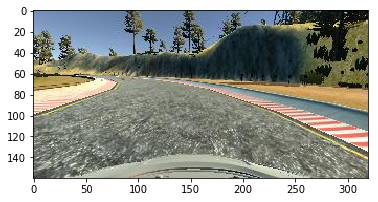

In [21]:
center_img = imread(driving_log['center_img'][0])
plt.imshow(center_img)

Image shape:  (160, 320, 3)


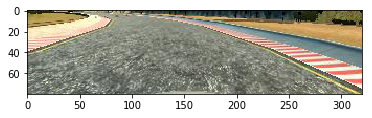

In [22]:
print("Image shape: ", center_img.shape)
plt.imshow(center_img[60:140, :])

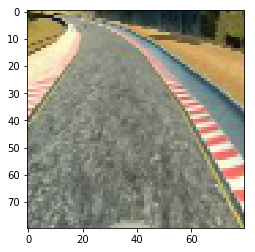

In [23]:
plt.imshow(imresize(center_img[60:140, :], (80,80)))

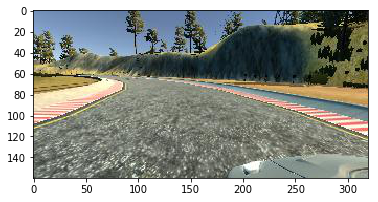

In [24]:
left_img = imread(driving_log['left_img'][0])
plt.imshow(left_img)

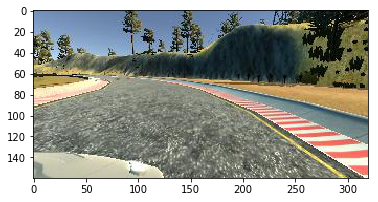

In [25]:
right_img = imread(driving_log['right_img'][0])
plt.imshow(right_img)

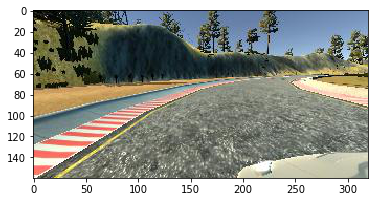

In [38]:
## test flip image
flipped_right = np.fliplr(right_img)
plt.imshow(flipped_right)

In [26]:
img_arr = create_dataset(driving_log)
print(img_arr.shape)

(2369, 80, 80, 3)


(array([  4.00000000e+00,   4.00000000e+00,   5.00000000e+00,
          1.20000000e+01,   1.70000000e+01,   4.10000000e+01,
          6.60000000e+01,   9.50000000e+01,   7.10000000e+01,
          4.10000000e+01,   1.96000000e+03,   1.30000000e+01,
          1.20000000e+01,   9.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   6.00000000e+00]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

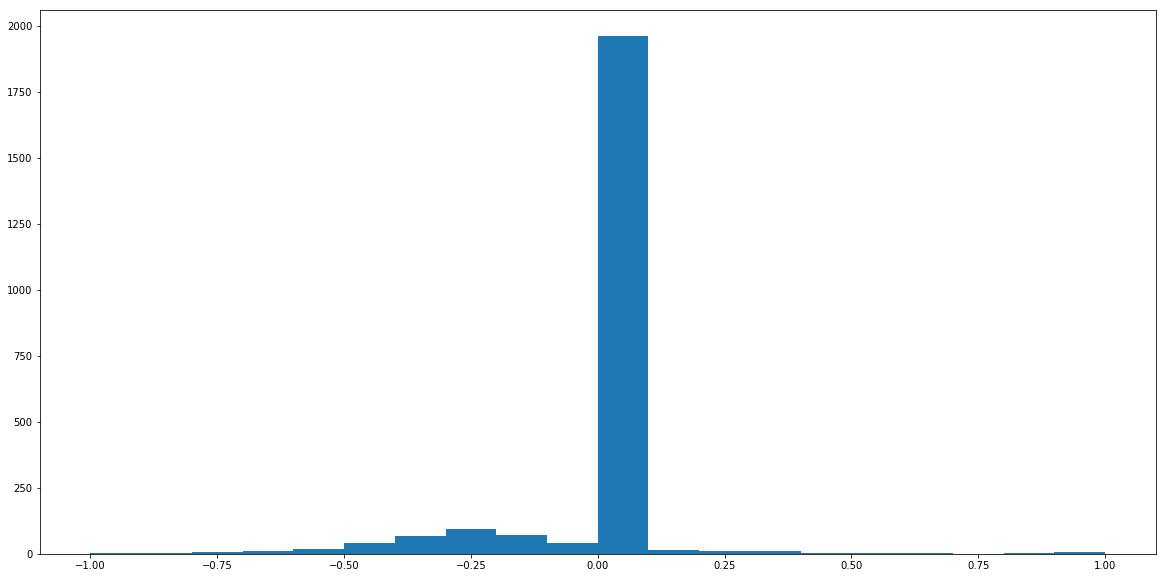

In [27]:
plt.figure(figsize=(20, 10))
plt.hist(driving_log['steering_angle'], 20)

In [37]:
temp_y_data = np.array(driving_log['steering_angle'])
print(temp_y_data)
print(len(np.where(temp_y_data == 0.0)))
zero_val_indexes = np.where(temp_y_data == 0.0)
print(temp_y_data[zero_val_indexes])
print(type(zero_val_indexes[0]))
print(zero_val_indexes[0].shape)
print(randomly_remove_zero_angle_images(0, temp_y_data))

[ 0.  0.  0. ...,  0.  0.  0.]
1
[ 0.  0.  0. ...,  0.  0.  0.]
<class 'numpy.ndarray'>
(1947,)
1
